In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D


In [65]:
data = pd.read_csv('DaneSportowcow.csv')
le = LabelEncoder()
data['discipline'] = le.fit_transform(data['discipline'])
columns = ['sex','age', 'height', 'weight','discipline','AeT', 'AnT','vo2max','vo2_at', 've','r','hrmax','vo2max_l_m','hr_8','la_8','hr_10','la_10','hr_12','la_12','z2','z3','z4',]
X = data[columns].dropna()  

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [55]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [60]:
# Add KMeans cluster labels to the original data
data_with_kmeans_clusters = X.copy()  # Create a copy of your original feature data
data_with_kmeans_clusters['Cluster'] = kmeans_labels  # Add the cluster labels

# View data points grouped by cluster
grouped_kmeans = data_with_kmeans_clusters.groupby('Cluster')
for cluster_id, group in grouped_kmeans:
    print(f"\nCluster {cluster_id}:")
    print(group)
data_with_kmeans_clusters.to_csv('kmeans_clustered_data.csv', index=False)



Cluster 0:
     sex  age  height  weight  discipline  AeT  AnT  vo2max  vo2_at     ve  \
1      0   33     171    64.0          11  171  184    52.8    47.8  113.2   
2      1   38     185    72.0          11  157  178    56.2    54.6  122.5   
3      1   37     182    81.0          25  134  176    53.3    51.9  154.9   
4      1   40     175    72.0          11  139  158    58.7    46.7  135.8   
5      1   26     174    63.0          11  152  178    58.6    54.6  114.8   
..   ...  ...     ...     ...         ...  ...  ...     ...     ...    ...   
172    1   45     181    69.0          11  134  163    61.4    57.6  164.1   
177    0   16     160    60.0          25  161  187    46.3    44.7  102.2   
179    1   28     187    85.0          11  152  187    58.9    55.6  154.2   
180    1   33     178    87.0          11  167  188    51.8    41.9  159.6   
181    1   23     173    57.0          11  141  174    72.2    59.8  145.8   

     ...  hr_8  la_8  hr_10  la_10  hr_12  la_12   

In [56]:
affinity = AffinityPropagation(random_state=42)
affinity_labels = affinity.fit_predict(X_scaled)

In [62]:
data_with_clusters = X.copy()  # Create a copy of your original feature data
data_with_clusters['Cluster'] = affinity_labels  # Add the cluster labels

# View data points grouped by cluster
grouped = data_with_clusters.groupby('Cluster')
for cluster_id, group in grouped:
    print(f"\nCluster {cluster_id}:")
    print(group)

data_with_clusters.to_csv('affinit_clustered_data.csv', index=False)



Cluster 0:
     sex  age  height  weight  discipline  AeT  AnT  vo2max  vo2_at     ve  \
18     1   51     183    80.0          11  129  152    44.7    36.8  112.6   
46     1   48     171    71.0          11  135  159    53.3    43.5  132.8   
66     1   51     189   101.0          11  138  160    45.3    36.7  139.8   
95     1   59     176    76.0          11  123  156    47.3    38.7  156.2   
96     1   58     186    71.0          25  131  154    45.4    33.5  124.3   
161    1   42     185    86.0          11  121  143    52.6    41.8  127.4   
164    1   52     184    76.0          11  121  159    47.3    44.6  128.0   

     ...  hr_8  la_8  hr_10  la_10  hr_12  la_12   z2   z3   z4  Cluster  
18   ...   138   4.6    152    4.4    161    5.2  121  130  144        0  
46   ...   138   5.6    155    5.3    169    6.0  126  136  147        0  
66   ...   143   6.2    154    5.8    163    5.3  131  139  154        0  
95   ...   124   6.6    136    6.3    150    4.4  115  124  145

In [58]:
print(f"Silhouette Score for K-Means: {silhouette_score(X_scaled, kmeans_labels):.2f}")
print(f"Silhouette Score for Affinity Propagation: {silhouette_score(X_scaled, affinity_labels):.2f}")

Silhouette Score for K-Means: 0.18
Silhouette Score for Affinity Propagation: 0.11


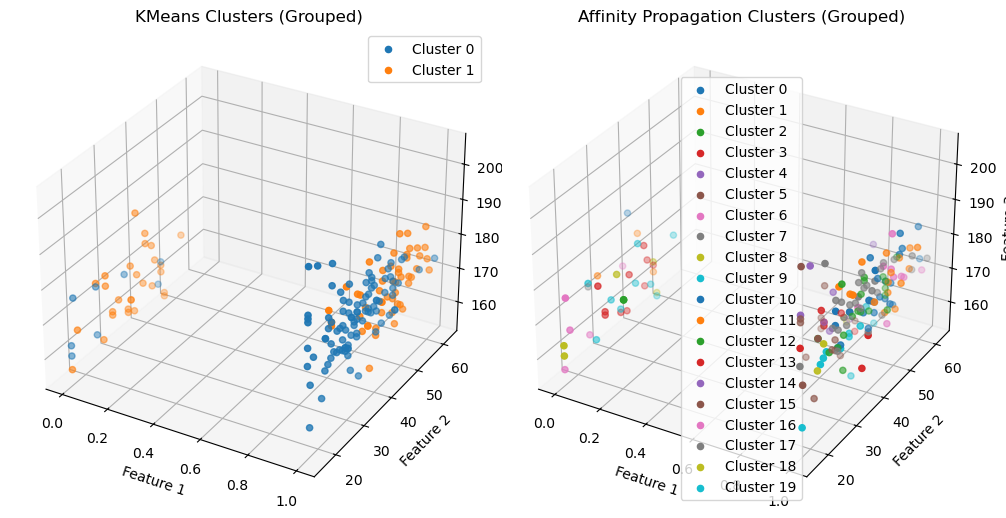

In [69]:
# KMeans 3D Scatter Plot - Grouped Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(121, projection='3d')

# Iterate through each KMeans cluster and plot the points
for cluster_id, group in grouped_kmeans:
    ax.scatter(group.iloc[:, 0], group.iloc[:, 1], group.iloc[:, 2], label=f'Cluster {cluster_id}')

ax.set_title('KMeans Clusters (Grouped)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()

# Affinity Propagation 3D Scatter Plot - Grouped Clusters
ax2 = fig.add_subplot(122, projection='3d')

# Iterate through each Affinity Propagation cluster and plot the points
for cluster_id, group in grouped:
    ax2.scatter(group.iloc[:, 0], group.iloc[:, 1], group.iloc[:, 2], label=f'Cluster {cluster_id}')

ax2.set_title('Affinity Propagation Clusters (Grouped)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()
